In [88]:
import pandas as pd


column_names = ["State_name", "Date", "Confirmed", "Deaths", "Recovered", "Incident_rate", "fatality_ratio"]
data = pd.read_csv('data/dhurba_cleaned.csv', names=column_names)
# convert the first column state names all to lowercase 
data['State_name'] = data['State_name'].str.lower()
data.head(5)

,State_name,Date,Confirmed,Deaths,Recovered,Incident_rate,fatality_ratio
0,alabama,2020-05-30,17262,610,0,521.907385,2.984871
1,alabama,2020-05-31,17689,618,0,535.314523,2.976633
2,alabama,2020-06-01,18200,630,0,551.175941,2.955184
3,alabama,2020-06-02,18525,644,0,559.965824,2.961812
4,alabama,2020-06-03,18734,651,0,566.273073,2.986306


In [89]:
column_names2 = ['','Date','location','new_person_vaccinated','cumulative_vaccinated', 'new_person_fully_vaccinated', 'cumulative_person_fully_vaccinated', 'new_vaccine_dose_administered', 'cumulative_vaccine_doses_administered' ]
data2 = pd.read_csv('data/remi_cleaned.csv', names=column_names2)
# convert the 'Date' column to datetime format
data2['Date'] = pd.to_datetime(data2['Date'])

data2.drop(data2.columns[0], axis=1, inplace=True)
data2.head(5)

,Date,location,new_person_vaccinated,cumulative_vaccinated,new_person_fully_vaccinated,cumulative_person_fully_vaccinated,new_vaccine_dose_administered,cumulative_vaccine_doses_administered
0,2022-09-16,US_WY,338.0,343443.0,243.0,300639.0,2318.0,781320
1,2022-09-15,US_WY,0.0,343105.0,0.0,300396.0,0.0,779002
2,2022-09-14,US_WY,0.0,343105.0,0.0,300396.0,0.0,779002
3,2022-09-13,US_WY,0.0,343105.0,0.0,300396.0,0.0,779002
4,2022-09-12,US_WY,0.0,343105.0,0.0,300396.0,0.0,779002


In [90]:
# mappings
region_mappings = {
    "US_AL": "alabama",
    "US_AK": "alaska",
    "US_AZ": "arizona",
    "US_AR": "arkansas",
    "US_CA": "california",
    "US_CO": "colorado",
    "US_CT": "connecticut",
    "US_DE": "delaware",
    "US_FL": "florida",
    "US_GA": "georgia",
    "US_HI": "hawaii",
    "US_ID": "idaho",
    "US_IL": "illinois",
    "US_IN": "indiana",
    "US_IA": "iowa",
    "US_KS": "kansas",
    "US_KY": "kentucky",
    "US_LA": "louisiana",
    "US_ME": "maine",
    "US_MD": "maryland",
    "US_MA": "massachusetts",
    "US_MI": "michigan",
    "US_MN": "minnesota",
    "US_MS": "mississippi",
    "US_MO": "missouri",
    "US_MT": "montana",
    "US_NE": "nebraska",
    "US_NV": "nevada",
    "US_NH": "new hampshire",
    "US_NJ": "new jersey",
    "US_NM": "new mexico",
    "US_NY": "new york",
    "US_NC": "north carolina",
    "US_ND": "north dakota",
    "US_OH": "ohio",
    "US_OK": "oklahoma",
    "US_OR": "oregon",
    "US_PA": "pennsylvania",
    "US_RI": "rhode island",
    "US_SC": "south carolina",
    "US_SD": "south dakota",
    "US_TN": "tennessee",
    "US_TX": "texas",
    "US_UT": "utah",
    "US_VT": "vermont",
    "US_VA": "virginia",
    "US_WA": "washington",
    "US_WV": "west virginia",
    "US_WI": "wisconsin",
    "US_WY": "wyoming",
    "US_DC": "district of columbia",
    "US_PR": "puerto rico",
    "US_GU": "guam",
    "US_VI": "virgin islands",
    "US_MP": "northern mariana islands",
    "US_AS": "american samoa"
}



In [91]:
# open file chad_cleaned.csv
f = open("data/chad_cleaned.csv", "r")
lines = f.readlines()
# // filter lines and save only the lines that containe "Per capita personal income 6" 
lines = [line for line in lines if "Per capita personal income 6" in line]
impdats = [(line.split(" ")[0], line.split(" ")[1], float(line.split(",")[-1])) for line in lines]
# // remove those that have new in the second 
impdats = [impdat for impdat in impdats if "new" not in impdat[1]]
impdats = [impdat for impdat in impdats if "northern" not in impdat[1]]

# now filter for "new york" and "Per capita personal income 6"
f = open("data/chad_cleaned.csv", "r")
lines = f.readlines()
lines = [line for line in lines if "Per capita personal income 6" in line]
impdats222 = [(line.split(" ")[0], line.split(" ")[1]+ " " +line.split(" ")[2], float(line.split(",")[-1])) for line in lines]
impdats222 = [impdat for impdat in impdats222 if "New York" in impdat[1]]
# add to the impdats list
impdats = impdats + impdats222

# // do the same for  "northern mariana islands"
f = open("data/chad_cleaned.csv", "r")
lines = f.readlines()
lines = [line for line in lines if "Per capita personal income 6" in line]
impdats222 = [(line.split(" ")[0], line.split(" ")[1]+ " " +line.split(" ")[2], float(line.split(",")[-1])) for line in lines]
impdats222 = [impdat for impdat in impdats222 if "Northern Mariana Islands" in impdat[1]]

pci_df = pd.DataFrame(impdats, columns=["Date", "Statename", "Per_capita_income"])
pci_df['Date'] = pd.to_datetime(pci_df['Date'])
pci_df['Statename'] = pci_df['Statename'].str.lower()
pci_df.head(5)

,Date,Statename,Per_capita_income
0,2020-01-01,alabama,45887.0
1,2020-01-01,alaska,61898.0
2,2020-01-01,arizona,52133.0
3,2020-01-01,arkansas,47147.0
4,2020-01-01,california,70061.0


In [92]:
# open file chad_cleaned.csv
f = open("data/chad_cleaned.csv", "r")
lines = f.readlines()
# // filter lines and save only the lines that containe "Per capita personal income 6" 
lines = [line for line in lines if "Gross domestic product (GDP)" in line]
impdats = [(line.split(" ")[0], line.split(" ")[1], float(line.split(",")[-1])) for line in lines]

# now filter for "new york" and "Per capita personal income 6"
f = open("data/chad_cleaned.csv", "r")
lines = f.readlines()
lines = [line for line in lines if "Gross domestic product (GDP)" in line]
impdats222 = [(line.split(" ")[0], line.split(" ")[1]+ " " +line.split(" ")[2], float(line.split(",")[-1])) for line in lines]
impdats222 = [impdat for impdat in impdats222 if "New York" in impdat[1]]
# add to the impdats list
impdats = impdats + impdats222

gdp_df = pd.DataFrame(impdats, columns=["Date", "Statename", "GDP"])
gdp_df['Date'] = pd.to_datetime(gdp_df['Date'])
gdp_df['Statename'] = gdp_df['Statename'].str.lower()
gdp_df.head(5)

,Date,Statename,GDP
0,2020-01-01,alabama,235118.3
1,2020-01-01,alaska,51261.5
2,2020-01-01,arizona,386443.5
3,2020-01-01,arkansas,135884.5
4,2020-01-01,california,3068809.4


In [93]:
state_to_code = {v: k for k, v in region_mappings.items()}
pci_df['Statename'] = pci_df['Statename'].map(state_to_code)
gdp_df['Statename'] = gdp_df['Statename'].map(state_to_code)
pci_df.head(5)

,Date,Statename,Per_capita_income
0,2020-01-01,US_AL,45887.0
1,2020-01-01,US_AK,61898.0
2,2020-01-01,US_AZ,52133.0
3,2020-01-01,US_AR,47147.0
4,2020-01-01,US_CA,70061.0


In [94]:
pci_df.dropna(inplace=True)

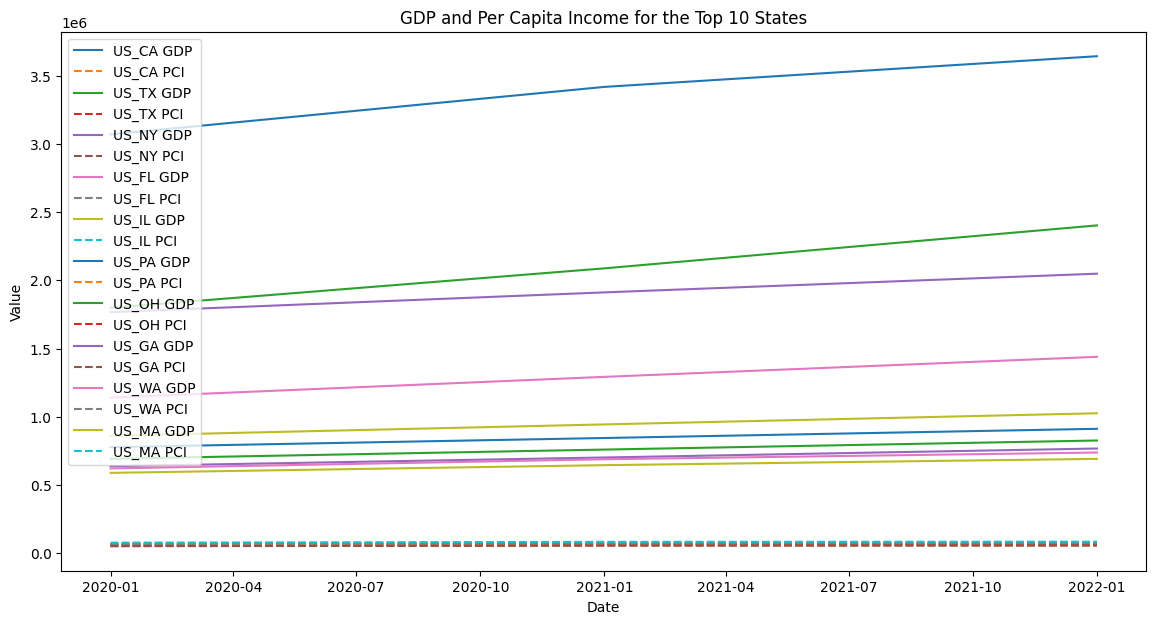

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have two DataFrames named 'gdp_df' and 'pci_df' with 'Date', 'Statename', 'GDP', and 'Per_capita_income' columns.

# Merge the two DataFrames on 'Date' and 'Statename'
merged_df = pd.merge(gdp_df, pci_df, on=['Date', 'Statename'])

# Find the latest date in the dataset to get the most recent GDP and PCI values
latest_date = merged_df['Date'].max()
latest_data = merged_df[merged_df['Date'] == latest_date]

# Sort by GDP and get the top 10 states
top_gdp_states = latest_data.sort_values(by='GDP', ascending=False).head(10)['Statename'].tolist()

# Filter the merged DataFrame to include only the top states
top_states_data = merged_df[merged_df['Statename'].isin(top_gdp_states)]

# Plotting
plt.figure(figsize=(14, 7))

# Plot GDP and PCI for each of the top states
for state in top_gdp_states:
    state_data = top_states_data[top_states_data['Statename'] == state]
    plt.plot(state_data['Date'], state_data['GDP'], label=f'{state} GDP')
    plt.plot(state_data['Date'], state_data['Per_capita_income'], label=f'{state} PCI', linestyle='--')

# Adding titles and labels
plt.title('GDP and Per Capita Income for the Top 10 States')
plt.xlabel('Date')
plt.ylabel('Value')

# Show legend
plt.legend()

# Display the plot
plt.show()


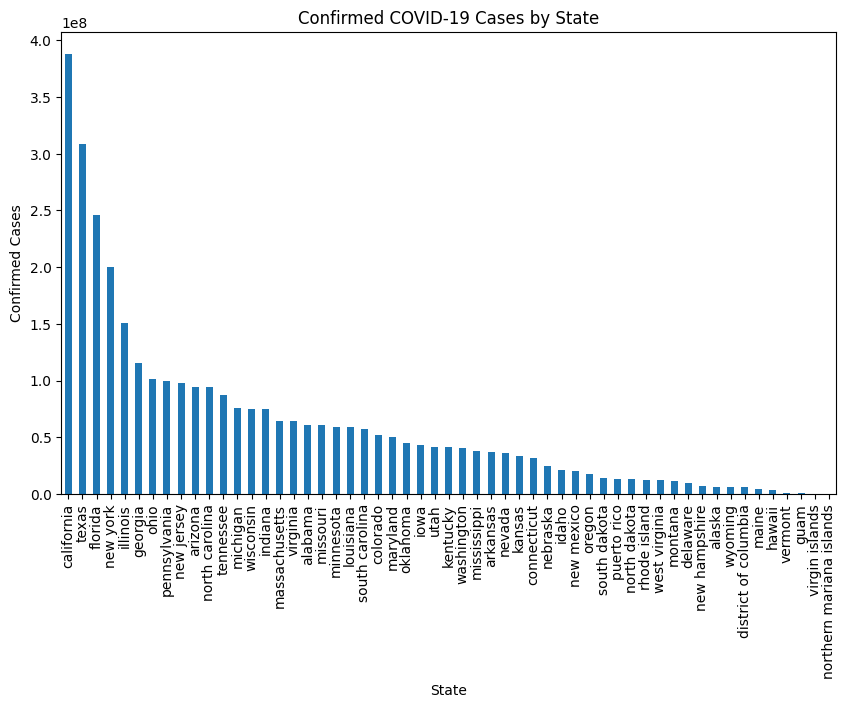

In [96]:
import matplotlib.pyplot as plt

state_data = data.groupby('State_name')['Confirmed'].sum()

state_data = state_data.sort_values(ascending=False)

state_data.plot(kind='bar', figsize=(10,6))

plt.xlabel('State')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed COVID-19 Cases by State')

plt.show()


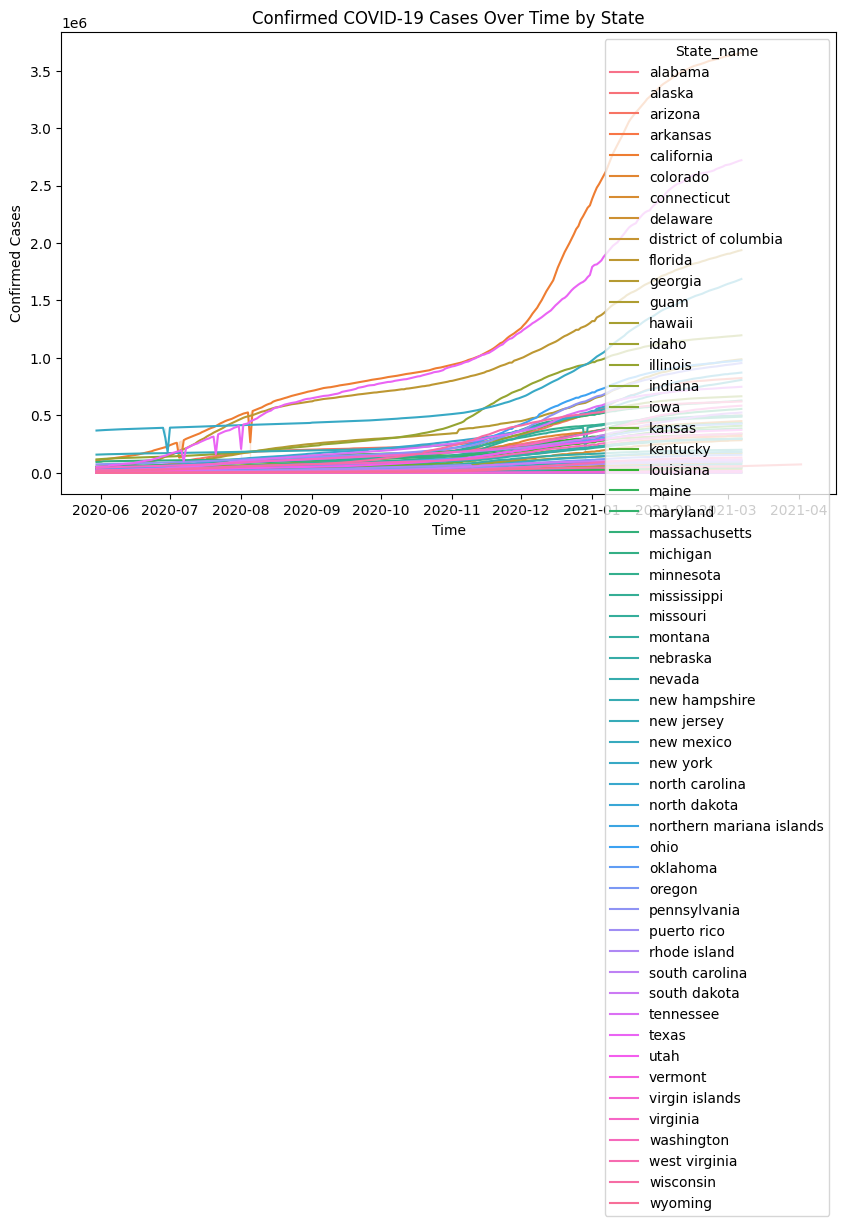

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x='Date', y='Confirmed', hue='State_name', data=data, ax=ax)

plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed COVID-19 Cases Over Time by State')

plt.show()


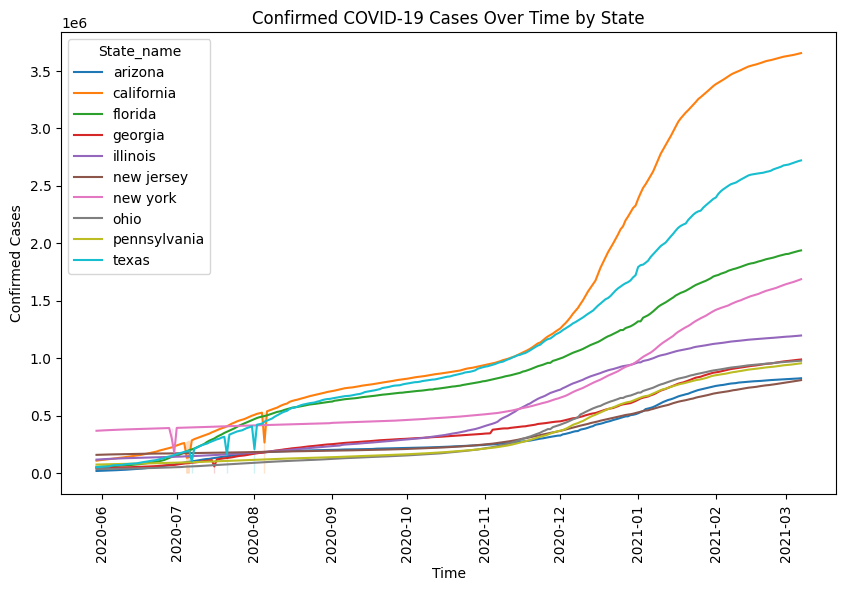

In [98]:
state_data = data.groupby('State_name')['Confirmed'].sum()

# filter the data to only include the top 10 states
top_states = state_data.nlargest(10).index
filtered_data = data[data['State_name'].isin(top_states)]

fig, ax = plt.subplots(figsize=(10,6))

plt.xticks(rotation=90)
sns.lineplot(x='Date', y='Confirmed', hue='State_name', data=filtered_data, ax=ax)
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed COVID-19 Cases Over Time by State')

plt.show()


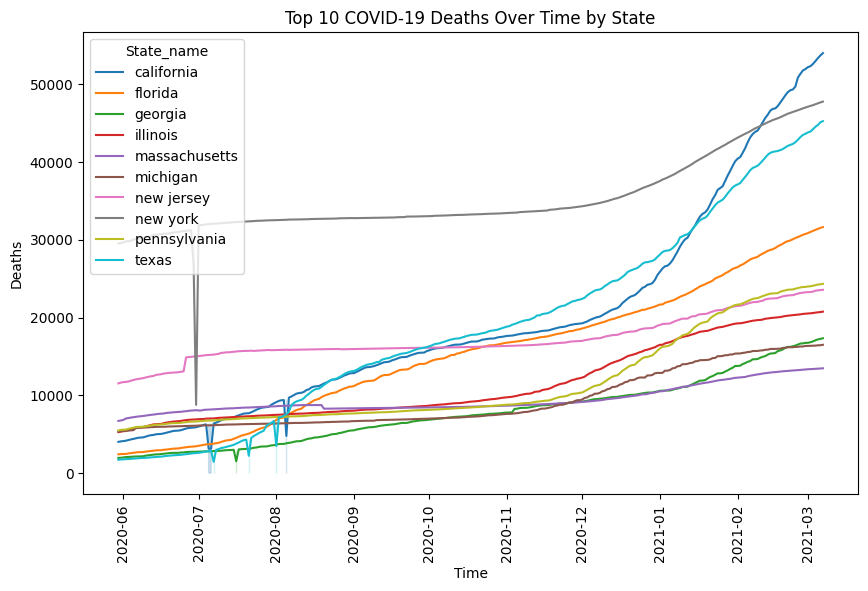

In [99]:
# group the data by state and sum the deaths
state_data = data.groupby('State_name')['Deaths'].sum()

top_states = state_data.nlargest(10).index

filtered_data = data[data['State_name'].isin(top_states)]

fig, ax = plt.subplots(figsize=(10,6))
plt.xticks(rotation=90)
sns.lineplot(x='Date', y='Deaths', hue='State_name', data=filtered_data, ax=ax)
plt.xlabel('Time')
plt.ylabel('Deaths')
plt.title('Top 10 COVID-19 Deaths Over Time by State')

plt.show()


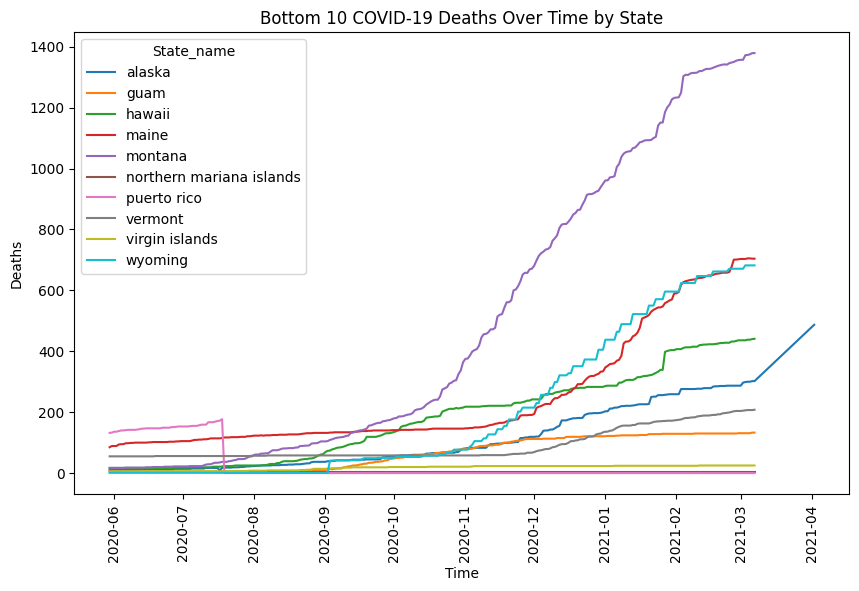

In [100]:
state_data = data.groupby('State_name')['Deaths'].sum()

# get the top 10 states with the lowest number of deaths
top_states = state_data.nsmallest(10).index
filtered_data = data[data['State_name'].isin(top_states)]

fig, ax = plt.subplots(figsize=(10,6))

plt.xticks(rotation=90)
sns.lineplot(x='Date', y='Deaths', hue='State_name', data=filtered_data, ax=ax)
plt.xlabel('Time')
plt.ylabel('Deaths')
plt.title('Bottom 10 COVID-19 Deaths Over Time by State')

plt.show()


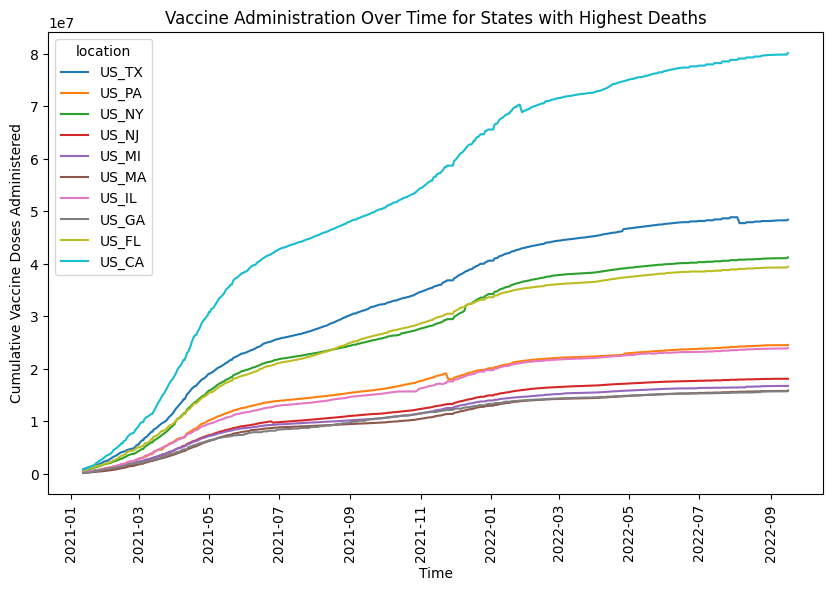

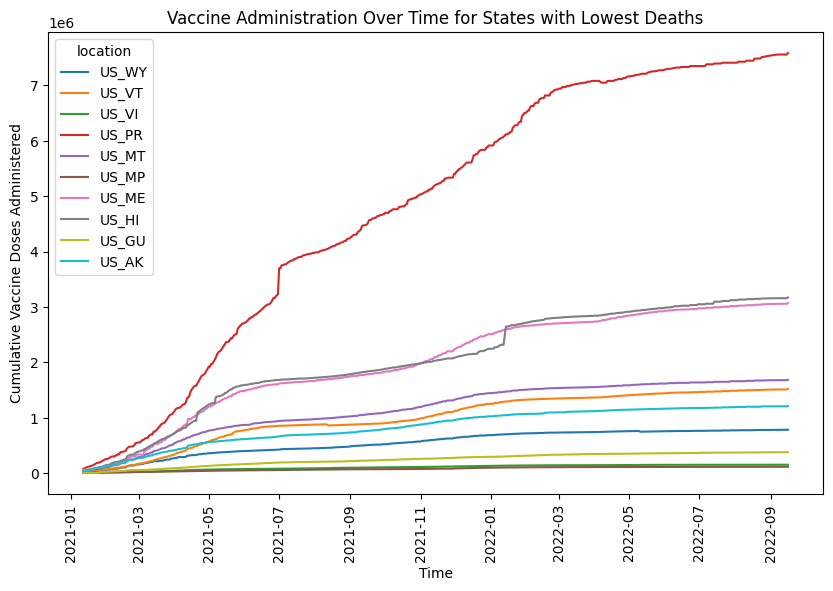

In [101]:
# filter the maps
state_to_code = {v: k for k, v in region_mappings.items()}

# map and group
data['State_name'] = data['State_name'].map(state_to_code)
state_data = data.groupby('State_name')['Deaths'].sum()

top_death_states = state_data.nlargest(10).index
low_death_states = state_data.nsmallest(10).index

filtered_data2_high = data2[data2['location'].isin(top_death_states)]
filtered_data2_low = data2[data2['location'].isin(low_death_states)]

fig, ax = plt.subplots(figsize=(10,6))
plt.xticks(rotation=90)
sns.lineplot(x='Date', y='cumulative_vaccine_doses_administered', hue='location', data=filtered_data2_high, ax=ax)
plt.xlabel('Time')
plt.ylabel('Cumulative Vaccine Doses Administered')
plt.title('Vaccine Administration Over Time for States with Highest Deaths')
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
plt.xticks(rotation=90)
sns.lineplot(x='Date', y='cumulative_vaccine_doses_administered', hue='location', data=filtered_data2_low, ax=ax)
plt.xlabel('Time')
plt.ylabel('Cumulative Vaccine Doses Administered')
plt.title('Vaccine Administration Over Time for States with Lowest Deaths')

plt.show()


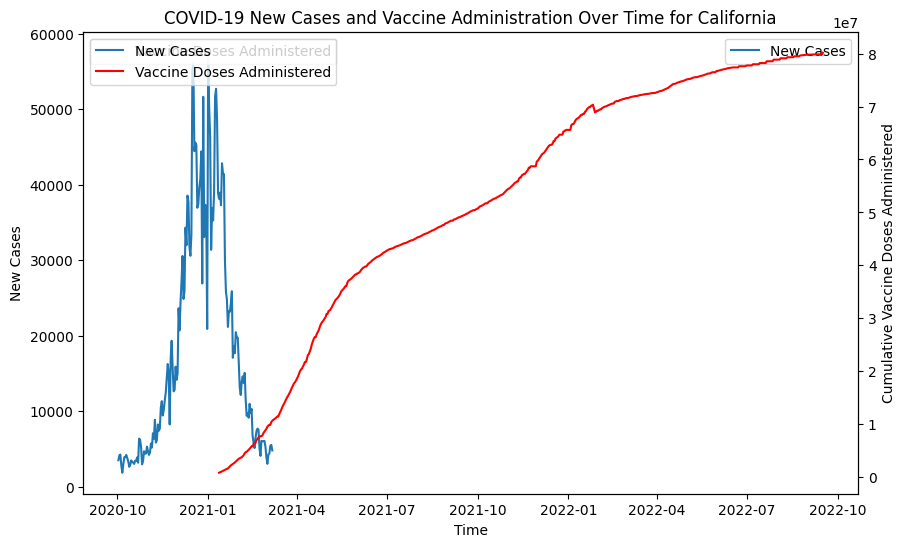

In [102]:
fig, ax1 = plt.subplots(figsize=(10,6))

#filter
data_CA = data[data['State_name'] == 'US_CA']
data_CA = data_CA[data_CA['Date'] >= '2020-10-01']
data2_CA = data2[data2['location'] == 'US_CA']
data_CA['New_cases'] = data_CA['Confirmed'].diff()

# first line plot
sns.lineplot(x='Date', y='New_cases', data=data_CA, ax=ax1, label='New Cases')

# second
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='cumulative_vaccine_doses_administered', data=data2_CA, ax=ax2, color='r', label='Vaccine Doses Administered')

ax1.set_xlabel('Time')
ax1.set_ylabel('New Cases')
ax2.set_ylabel('Cumulative Vaccine Doses Administered')
plt.title('COVID-19 New Cases and Vaccine Administration Over Time for California')

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.show()


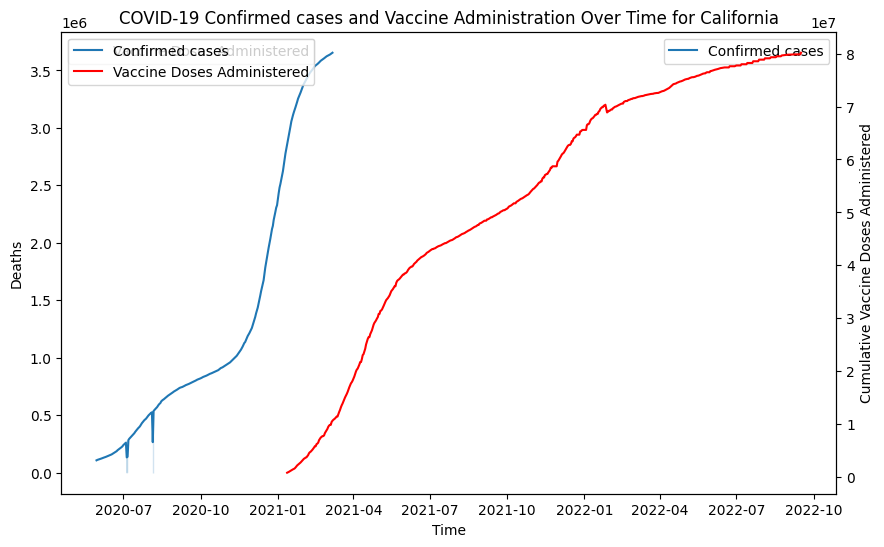

In [103]:
# filter
data_CA = data[data['State_name'] == 'US_CA']
data2_CA = data2[data2['location'] == 'US_CA']

fig, ax1 = plt.subplots(figsize=(10,6))

# first line plot
sns.lineplot(x='Date', y='Confirmed', data=data_CA, ax=ax1, label='Confirmed cases')

# second axes
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='cumulative_vaccine_doses_administered', data=data2_CA, ax=ax2, color='r', label='Vaccine Doses Administered')

ax1.set_xlabel('Time')
ax1.set_ylabel('Deaths')
ax2.set_ylabel('Cumulative Vaccine Doses Administered')
plt.title('COVID-19 Confirmed cases and Vaccine Administration Over Time for California')
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.show()


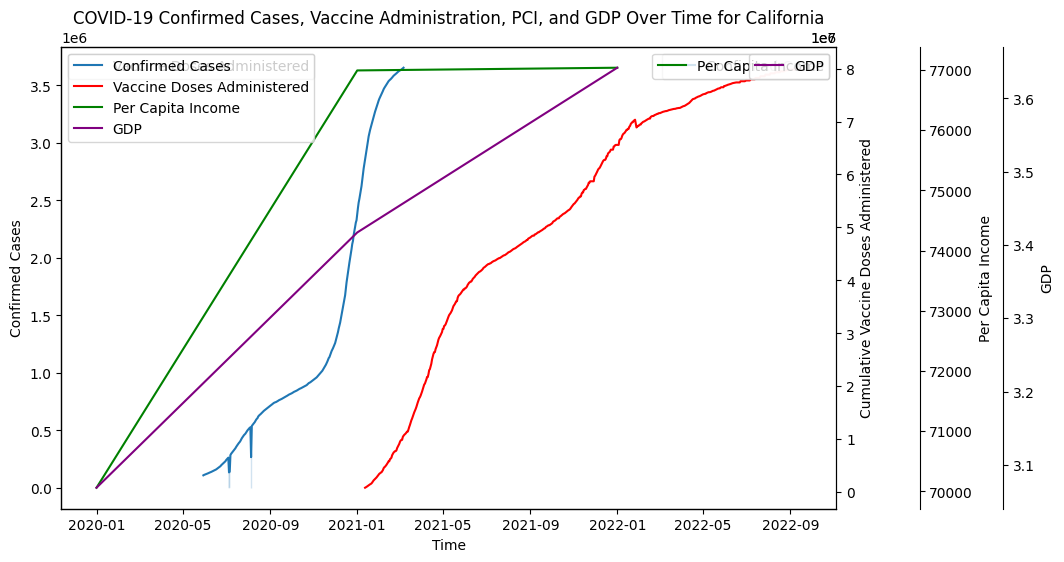

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter the data for California
data_CA = data[data['State_name'] == 'US_CA']
data2_CA = data2[data2['location'] == 'US_CA']
pci_CA = pci_df[pci_df['Statename'] == 'US_CA']
gdp_CA = gdp_df[gdp_df['Statename'] == 'US_CA']

fig, ax1 = plt.subplots(figsize=(10,6))

sns.lineplot(x='Date', y='Confirmed', data=data_CA, ax=ax1, label='Confirmed Cases')
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='cumulative_vaccine_doses_administered', data=data2_CA, ax=ax2, color='r', label='Vaccine Doses Administered')
ax1.set_xlabel('Time')
ax1.set_ylabel('Confirmed Cases')
ax2.set_ylabel('Cumulative Vaccine Doses Administered')
plt.title('COVID-19 Confirmed Cases, Vaccine Administration, PCI, and GDP Over Time for California')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
sns.lineplot(x='Date', y='Per_capita_income', data=pci_CA, ax=ax3, color='g', label='Per Capita Income')

ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
sns.lineplot(x='Date', y='GDP', data=gdp_CA, ax=ax4, color='purple', label='GDP')

ax3.set_ylabel('Per Capita Income')
ax4.set_ylabel('GDP')

handles, labels = [], []
for ax in [ax1, ax2, ax3, ax4]:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.show()


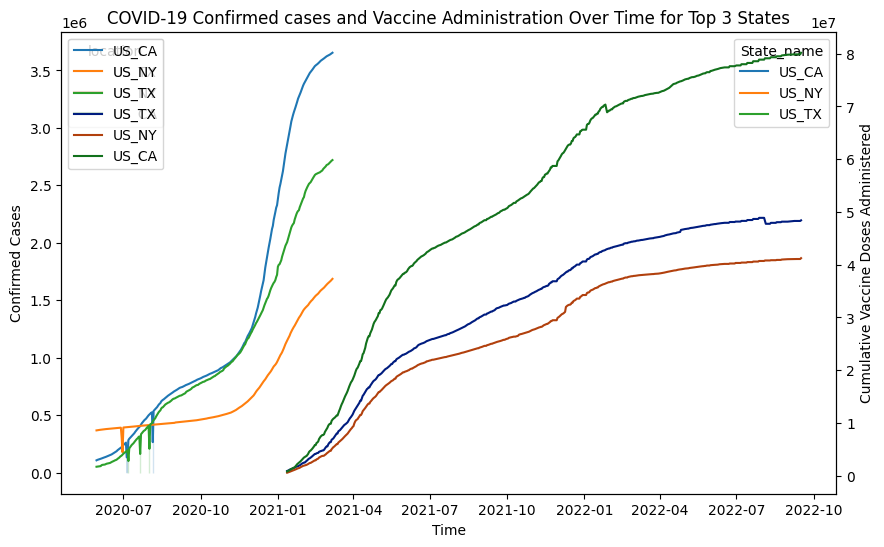

In [105]:
# group by deaths
state_data = data.groupby('State_name')['Deaths'].sum()

top_death_states = state_data.nlargest(3).index

filtered_data_high = data[data['State_name'].isin(top_death_states)]
filtered_data2_high = data2[data2['location'].isin(top_death_states)]

fig, ax1 = plt.subplots(figsize=(10,6))

sns.lineplot(x='Date', y='Confirmed', hue='State_name', data=filtered_data_high, ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='cumulative_vaccine_doses_administered', hue='location', data=filtered_data2_high, ax=ax2, palette='dark')
ax1.set_xlabel('Time')
ax1.set_ylabel('Confirmed Cases')
ax2.set_ylabel('Cumulative Vaccine Doses Administered')
plt.title('COVID-19 Confirmed cases and Vaccine Administration Over Time for Top 3 States')

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.show()


Index(['US_NY', 'US_CA', 'US_TX'], dtype='object', name='State_name')
          Date Statename  Per_capita_income
4   2020-01-01     US_CA            70061.0
43  2020-01-01     US_TX            55118.0
56  2021-01-01     US_CA            76991.0
95  2021-01-01     US_TX            60548.0
108 2022-01-01     US_CA            77036.0
147 2022-01-01     US_TX            62586.0
156 2020-01-01     US_NY            69873.0
157 2021-01-01     US_NY            75948.0
158 2022-01-01     US_NY            75407.0
          Date Statename        GDP
4   2020-01-01     US_CA  3068809.4
43  2020-01-01     US_TX  1798596.1
56  2021-01-01     US_CA  3416939.4
95  2021-01-01     US_TX  2087490.9
108 2022-01-01     US_CA  3641643.4
147 2022-01-01     US_TX  2402137.2
156 2020-01-01     US_NY  1766857.4
157 2021-01-01     US_NY  1911345.8
158 2022-01-01     US_NY  2048402.6
(9, 3)
(9, 3)


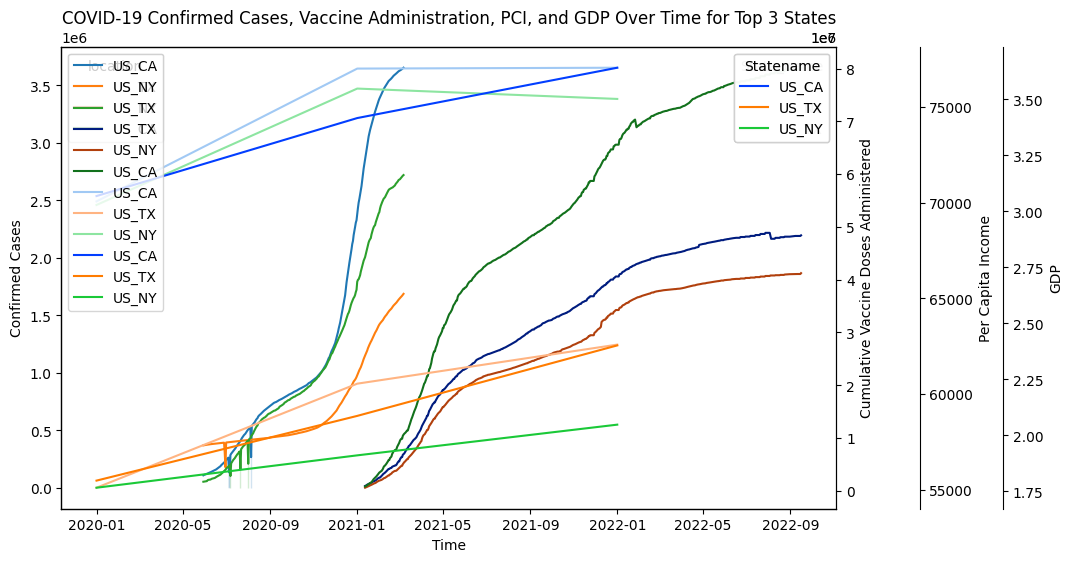

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

state_data = data.groupby('State_name')['Deaths'].sum()
top_death_states = state_data.nlargest(3).index
print(top_death_states)

# pci_df.head(5)

filtered_data_high = data[data['State_name'].isin(top_death_states)]
filtered_data2_high = data2[data2['location'].isin(top_death_states)]

pci_high = pci_df[pci_df['Statename'].isin(top_death_states)]
gdp_high = gdp_df[gdp_df['Statename'].isin(top_death_states)]
print(pci_high)
print(gdp_high)
print(pci_high.shape)
print(gdp_high.shape)


fig, ax1 = plt.subplots(figsize=(10,6))

sns.lineplot(x='Date', y='Confirmed', hue='State_name', data=filtered_data_high, ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='cumulative_vaccine_doses_administered', hue='location', data=filtered_data2_high, ax=ax2, palette='dark')

ax1.set_xlabel('Time')
ax1.set_ylabel('Confirmed Cases')
ax2.set_ylabel('Cumulative Vaccine Doses Administered')
plt.title('COVID-19 Confirmed Cases, Vaccine Administration, PCI, and GDP Over Time for Top 3 States')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
sns.lineplot(x='Date', y='Per_capita_income', hue='Statename', data=pci_high, ax=ax3, palette='pastel')

ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
sns.lineplot(x='Date', y='GDP', hue='Statename', data=gdp_high, ax=ax4, palette='bright')

ax3.set_ylabel('Per Capita Income')
ax4.set_ylabel('GDP')

handles, labels = [], []
for ax in [ax1, ax2, ax3, ax4]:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.show()


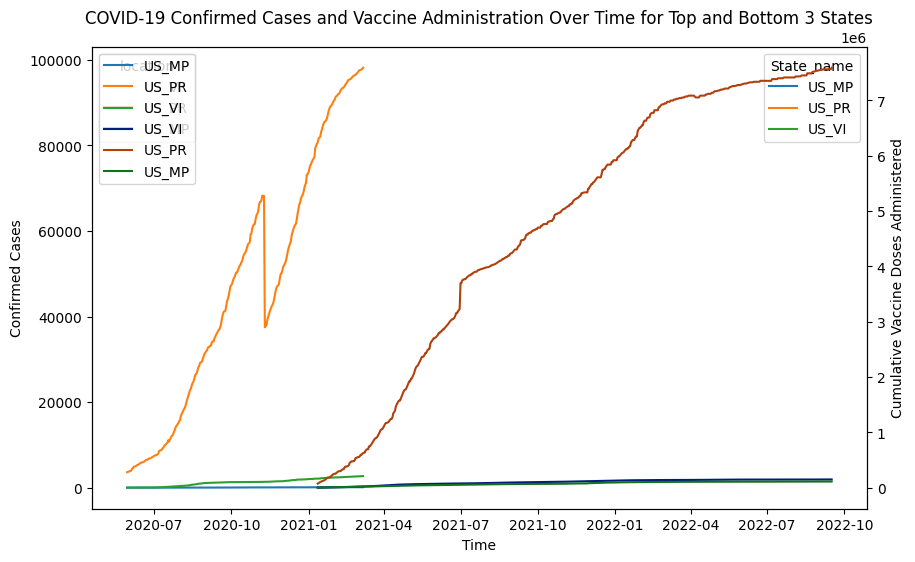

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

state_data = data.groupby('State_name')['Deaths'].sum()
selected_states = state_data.nsmallest(3).index

filtered_data_selected = data[data['State_name'].isin(selected_states)]
filtered_data2_selected = data2[data2['location'].isin(selected_states)]

fig, ax1 = plt.subplots(figsize=(10,6))

sns.lineplot(x='Date', y='Confirmed', hue='State_name', data=filtered_data_selected, ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='cumulative_vaccine_doses_administered', hue='location', data=filtered_data2_selected, ax=ax2, palette='dark')
ax1.set_xlabel('Time')
ax1.set_ylabel('Confirmed Cases')
ax2.set_ylabel('Cumulative Vaccine Doses Administered')
plt.title('COVID-19 Confirmed Cases and Vaccine Administration Over Time for Top and Bottom 3 States')

handles, labels = [], []
for ax in [ax1, ax2]:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.show()


Index(['US_CA', 'US_TX', 'US_FL', 'US_NY'], dtype='object', name='State_name')


C:\Users\dhurbatpt\AppData\Local\Temp\ipykernel_23660\3389421202.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_deaths['Death_rate'] = (filtered_data_deaths['Deaths'] / filtered_data_deaths['Confirmed']) * 100


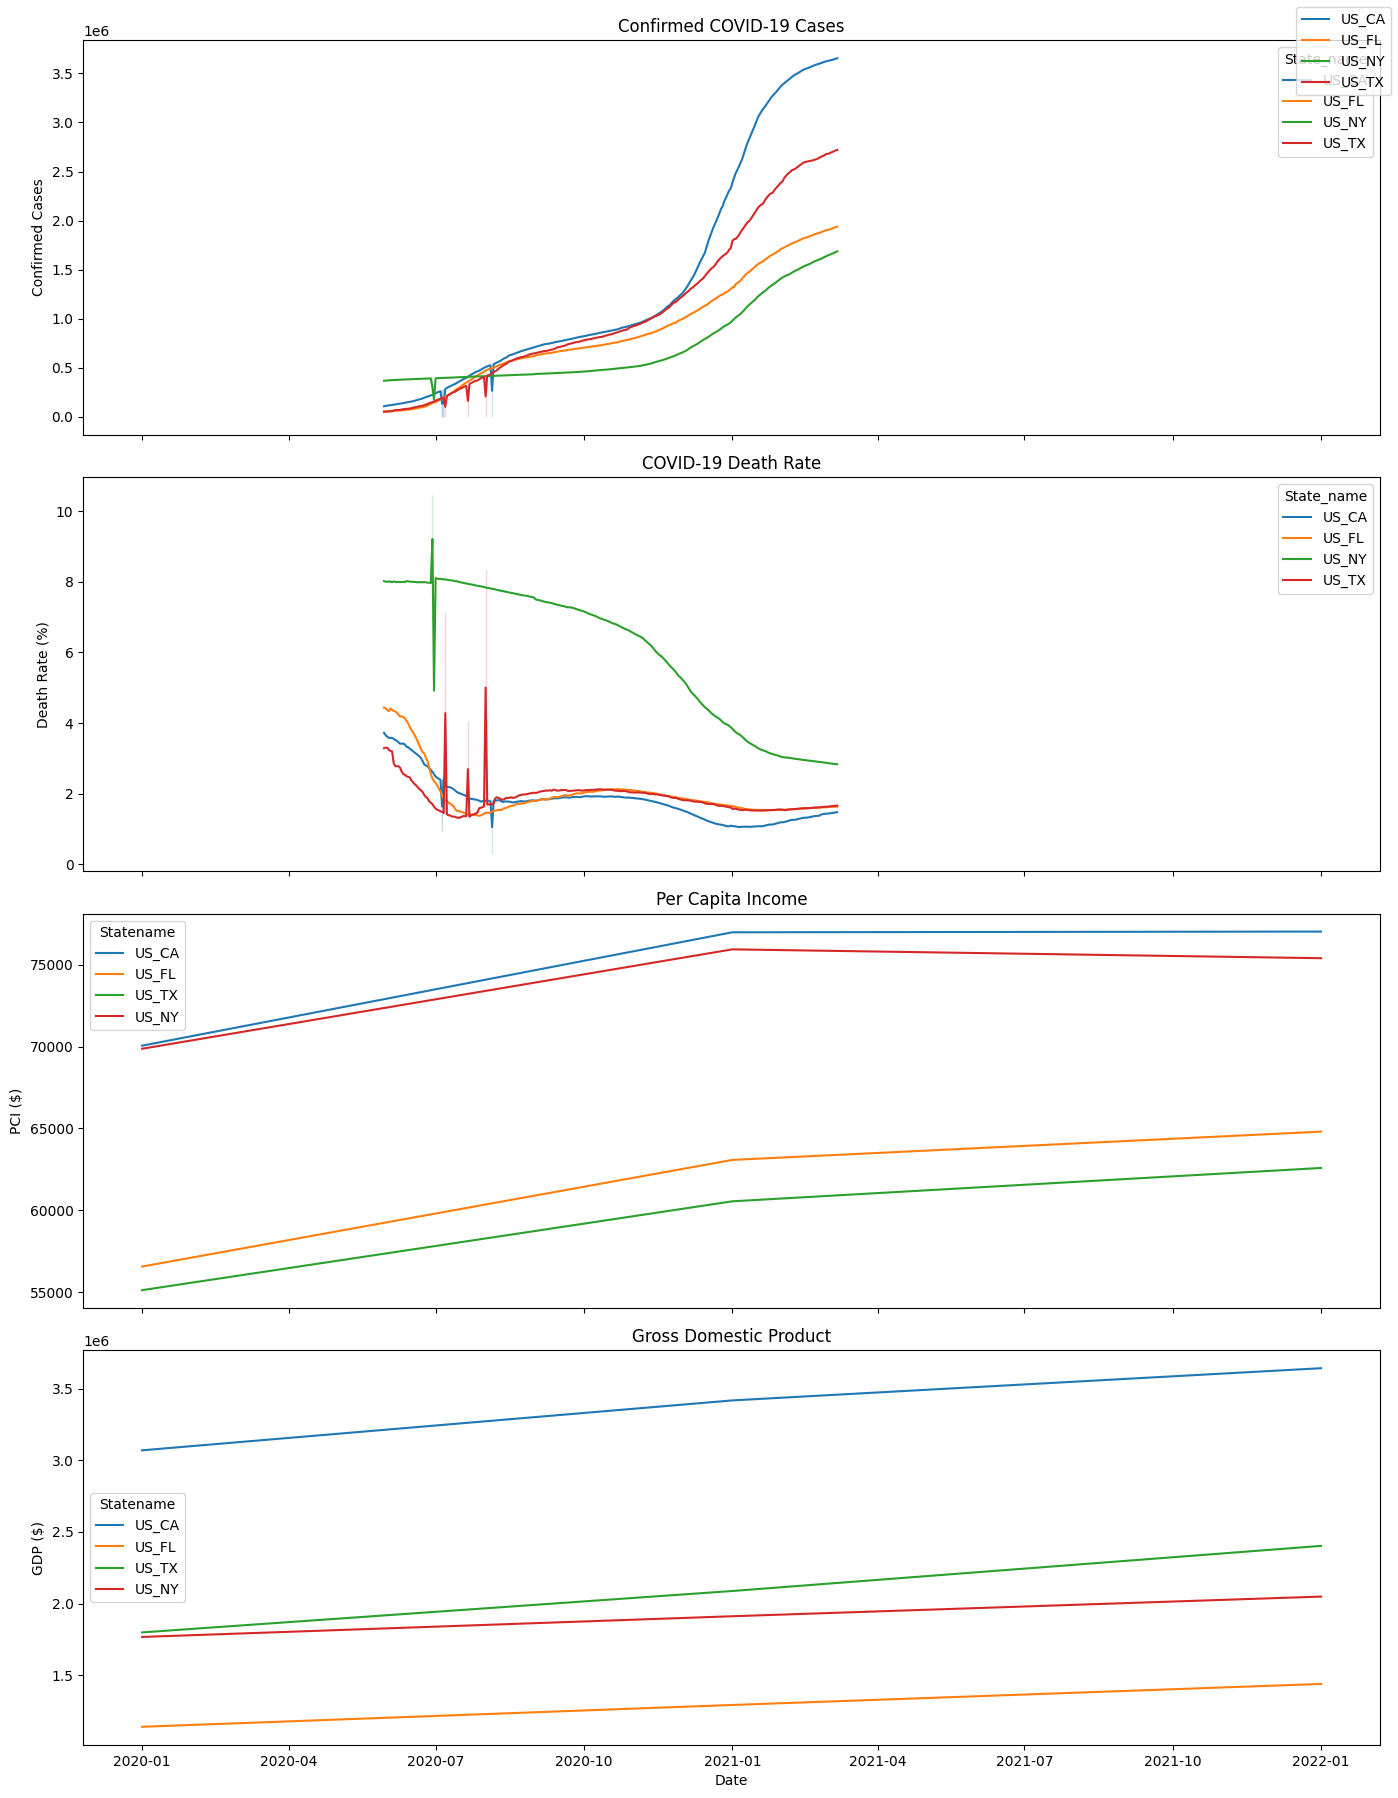

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

state_data_confirmed = data.groupby('State_name')['Confirmed'].sum()
top_confirmed_states = state_data_confirmed.nlargest(4).index

filtered_data_confirmed = data[data['State_name'].isin(top_confirmed_states)]
filtered_data_deaths = data[data['State_name'].isin(top_confirmed_states)]
print(top_confirmed_states)

pci_top = pci_df[pci_df['Statename'].isin(top_confirmed_states)]
gdp_top = gdp_df[gdp_df['Statename'].isin(top_confirmed_states)]

filtered_data_deaths['Death_rate'] = (filtered_data_deaths['Deaths'] / filtered_data_deaths['Confirmed']) * 100
fig, axs = plt.subplots(4, 1, figsize=(14, 18), sharex=True)

sns.lineplot(x='Date', y='Confirmed', hue='State_name', data=filtered_data_confirmed, ax=axs[0])
axs[0].set_title('Confirmed COVID-19 Cases')
axs[0].set_ylabel('Confirmed Cases')

sns.lineplot(x='Date', y='Death_rate', hue='State_name', data=filtered_data_deaths, ax=axs[1])
axs[1].set_title('COVID-19 Death Rate')
axs[1].set_ylabel('Death Rate (%)')

sns.lineplot(x='Date', y='Per_capita_income', hue='Statename', data=pci_top, ax=axs[2])
axs[2].set_title('Per Capita Income')
axs[2].set_ylabel('PCI ($)')

sns.lineplot(x='Date', y='GDP', hue='Statename', data=gdp_top, ax=axs[3])
axs[3].set_title('Gross Domestic Product')
axs[3].set_ylabel('GDP ($)')

axs[3].set_xlabel('Date')

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()
